In [1]:
import uavgeo as ug
import geopandas as gpd
import rioxarray
import numpy as np
import ultralytics
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

c:\users\judoj\documents\programming\uavgeo\uavgeo\compute\products.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# DEM DSM DTM CHM Creation from DEM metashape
1. load DSM
2. create 1m square grid
3. find local minima in every square
4. assume it is the correct ground measurement
5. burn back into a dem

6. Make it a uavgeo feature to create DEMs and CHMs from DSMs

In [2]:
# load data
#QGIS: rgb pixelsize = 0.018
rgb_2022_dsm = rxr.open_rasterio("../data/orthos/rgb_2022_dsm.tif",mode = "w")
#fix NAN values
rgb_2022_dsm = rgb_2022_dsm.where(rgb_2022_dsm.values !=-32767.)
#QGIS: ms pixelsize = 0.027
ms_2022_dsm = rxr.open_rasterio("../data/orthos/ms_2022_dsm.tif",mode = "w")
ms_2022_dsm = ms_2022_dsm.where(ms_2022_dsm.values !=-32767.)

In [6]:
pixel_size = 0.018
sampling_meters = 1
# sampling meters will define the grid-size from which to take the minimum value, in the case of an orchard,
# we can expect every square meter to contain at least 1 pixel with the lowest ground-point available.


#function will take a bit longer than the progress bar shows
dem = ug.compute.calc_dem_from_dsm(rgb_2022_dsm, pixel_size, sampling_meters)


  0%|          | 0/42846 [00:00<?, ?it/s]

c:\users\judoj\documents\programming\uavgeo\uavgeo\compute\products.py:34: RuntimeWarning: All-NaN axis encountered
  sampling_grid["h"] = sampling_grid.progress_apply(lambda x: np.nanmin(dsm.rio.clip_box(minx = x.geometry.bounds[0],


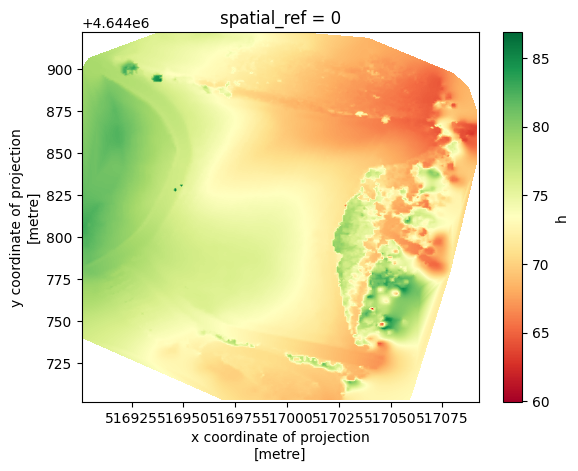

In [7]:
# it already looks really good at 1 meters tho!
dem.plot( cmap = "RdYlGn")

In [45]:
dem.rio.to_raster("../data/orthos/rgb_2022_dem.tif")

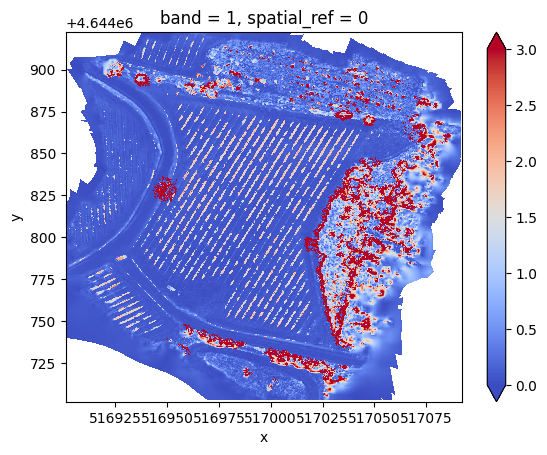

In [11]:
chm = rgb_2022_dsm - dem
chm.plot(cmap ="coolwarm",vmin=0.2, vmax=3)

In [9]:
chm.rio.to_raster("../data/orthos/rgb_2022_chm.tif")

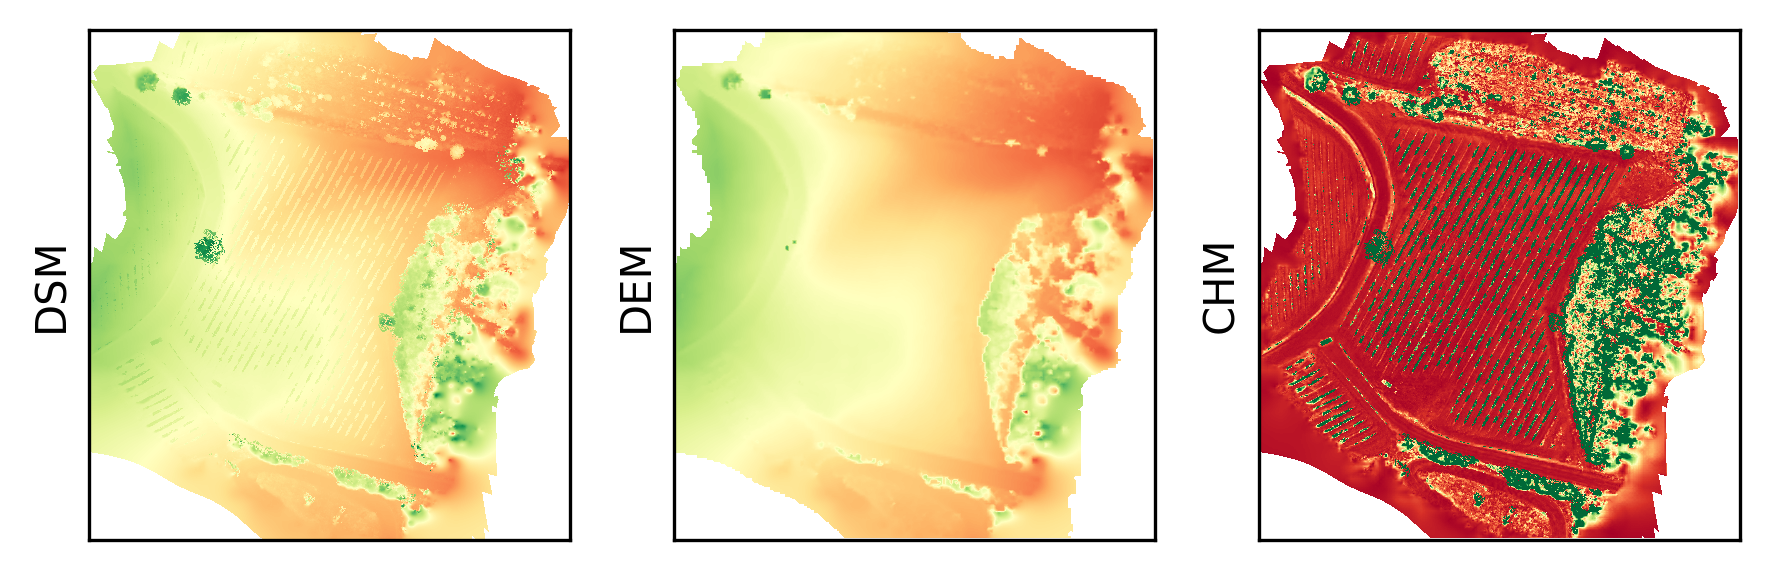

In [2]:
dsm = rxr.open_rasterio("../data/orthos/rgb_2022_dsm.tif",mode = "w")
dsm = dsm.where(dsm.values !=-32767.)
dem = rxr.open_rasterio("../data/orthos/rgb_2022_dem.tif",mode = "w")
chm = rxr.open_rasterio("../data/orthos/rgb_2022_chm.tif",mode = "w")

fig,ax = plt.subplots(figsize=(6,2),nrows =1, ncols = 3,dpi=300)

dsm.plot(ax=ax[0],cmap = "RdYlGn", vmin =60, vmax =90,add_colorbar=False)
ax[0].set_title("")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel("")
ax[0].set_ylabel("DSM")

dem.plot(ax=ax[1], cmap ="RdYlGn",vmin=60, vmax=90,add_colorbar=False)
ax[1].set_title("")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel("")
ax[1].set_ylabel("DEM")


chm.plot(ax=ax[2], cmap ="RdYlGn",vmin=0, vmax=1.5,add_colorbar=False)
ax[2].set_title("")
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xlabel("")
ax[2].set_ylabel("CHM")

plt.tight_layout()
plt.savefig("figures/BTG2022_dsm_dem_chm.png")
plt.show()